# Leasing Dataset 

The work processes and visualizes multiple financial datasets, focusing on trends, distributions, and merging data from various sources for better analysis. It handles data cleaning, transformation, and visualization using Python libraries like pandas, matplotlib, and seaborn.

## Collected datsets
 Andre utlån (nytegning) from Finfo
 
 Interest rates and related loan amounts (10648) from SSB

 
 Key Policy rate from Norges bank table number (08175) from SSB
 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# finfo dataset
finfo_df = pd.read_excel(
    "data/andre-utlan.xls",
    sheet_name="Andre utlån - nytegning",
)

finfo_df["År"] = pd.to_numeric(finfo_df["År"], errors="coerce")
finfo_df.rename(columns={"År": "year"}, inplace=True)
finfo_df = finfo_df[(finfo_df["year"] >= 2015) & (finfo_df["year"] <= 2023)]
finfo_df = finfo_df.astype(float)
finfo_df["year"] = finfo_df["year"].round(0).astype(int)
print(finfo_df)

   year  Personbiler  Transportmidler  Busser  Kontor/data  \
0  2023      54347.6           7610.1   355.0        135.2   
1  2022      64709.0           6863.4   788.5         24.8   
2  2021      55059.9           6252.5   128.0         53.0   
3  2020      44509.8           5344.6   142.3         81.0   
4  2019      45615.2           6113.3     NaN         80.9   
5  2018      47709.0           6072.6     NaN         46.6   
6  2017      46398.2           5461.5     NaN        280.7   
7  2016      38599.3           5249.9     NaN        196.3   
8  2015      33964.3           4703.6     NaN         65.9   

   Industr. Utstyr/maskiner  Skip, fly, tog og trikk  Bygn./fast eiendom  \
0                    2342.1                    560.5               1.700   
1                    1870.0                    325.5               2.800   
2                    1647.0                    442.8              33.300   
3                    1457.2                    284.9              16.000   

## Plotting Interest Rate Trend Over Time:
From the plot, it shows a significant shift in interest rate trends over time. Between 2015 and 2020, rates steadily declined, hitting a historic low of 0% in 2020, driven by the economic impact of COVID-19 and central banks' efforts to stimulate borrowing and economic activity. Rates remained at 0% during the pandemic before sharply increasing from late 2021 to 2023, peaking at 4.5%.



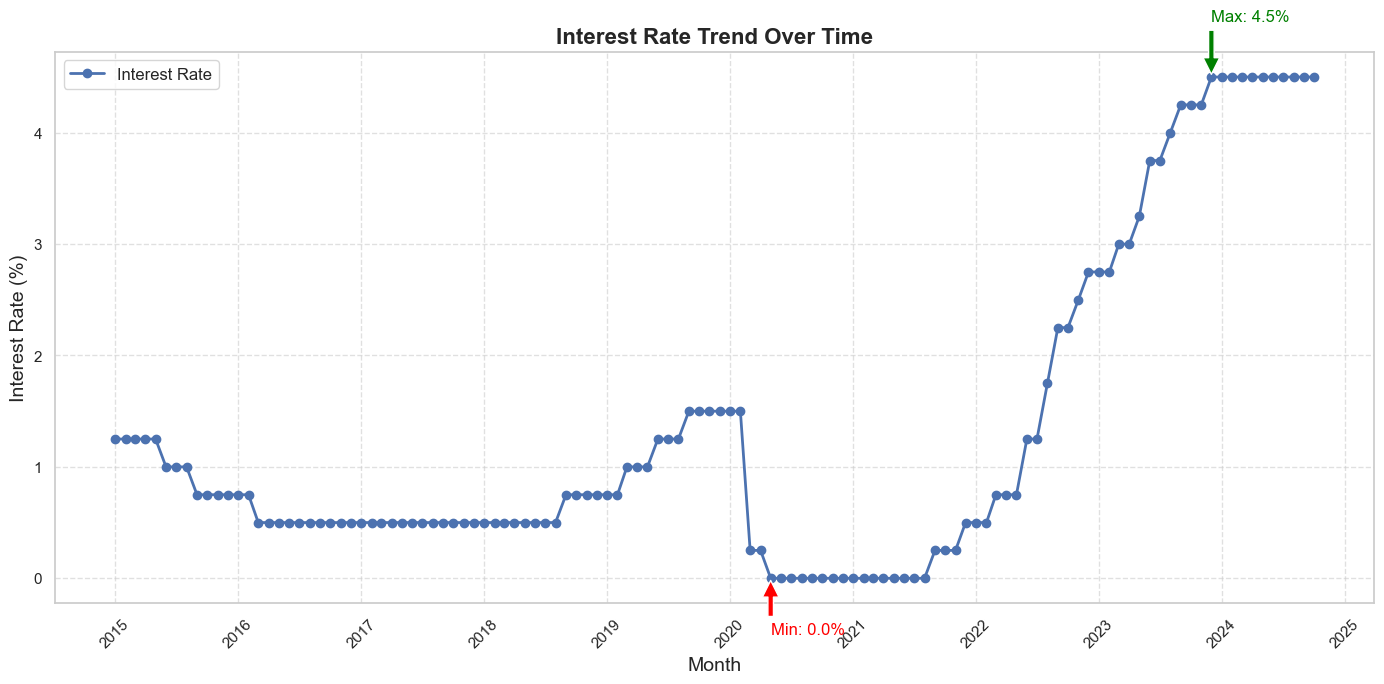

   year  average_interest  max_interest  min_interest
0  2023          3.625000          4.50          2.75
1  2022          1.437500          2.75          0.50
2  2021          0.104167          0.50          0.00
3  2020          0.291667          1.50          0.00
4  2019          1.187500          1.50          0.75
5  2018          0.583333          0.75          0.50
6  2017          0.500000          0.50          0.50
7  2016          0.541667          0.75          0.50
8  2015          1.020833          1.25          0.75


In [18]:
# ssb dataset Norges_bank_styringsrente
ssb_data = pd.read_csv("data/interestHist.csv")
ssb_data["month"] = pd.to_datetime(ssb_data["month"], format="%YM%m")
plt.figure(figsize=(14, 7))
plt.plot(
    ssb_data["month"],
    ssb_data["interest"],
    marker="o",
    linestyle="-",
    linewidth=2,
    markersize=6,
    label="Interest Rate",
)

plt.title("Interest Rate Trend Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Interest Rate (%)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)

max_point = ssb_data.loc[ssb_data["interest"].idxmax()]
min_point = ssb_data.loc[ssb_data["interest"].idxmin()]

plt.annotate(
    f"Max: {max_point['interest']}%",
    (max_point["month"], max_point["interest"]),
    xytext=(max_point["month"], max_point["interest"] + 0.5),
    arrowprops=dict(facecolor="green", shrink=0.05),
    fontsize=12,
    color="green",
)

plt.annotate(
    f"Min: {min_point['interest']}%",
    (min_point["month"], min_point["interest"]),
    xytext=(min_point["month"], min_point["interest"] - 0.5),
    arrowprops=dict(facecolor="red", shrink=0.05),
    fontsize=12,
    color="red",
)

plt.tight_layout()
plt.show()


ssb_data["month"] = pd.to_datetime(ssb_data["month"], format="%YM%m")
ssb_data["year"] = ssb_data["month"].dt.year
ssb_data = (
    ssb_data.groupby("year")["interest"].agg(["mean", "max", "min"]).reset_index()
)
ssb_data.rename(
    columns={"mean": "average_interest", "max": "max_interest", "min": "min_interest"},
    inplace=True,
)
ssb_data = ssb_data[(ssb_data["year"] >= 2015) & (ssb_data["year"] <= 2023)]
ssb_data = ssb_data.sort_values(by="year", ascending=False).reset_index(drop=True)

print(ssb_data)

In [19]:
finance_companies_rate_dataset = pd.read_csv("data/utlånsrente-finansieringselskap.csv")
finance_companies_rate_dataset["year"] = (
    finance_companies_rate_dataset["month"].str.extract(r"(\d{4})").astype(int)
)
yearly_data = (
    finance_companies_rate_dataset.groupby("year")
    .agg(
        {
            "lending_interest_inklprovisions_finansierselskap": "mean",  # Average interest rate
        }
    )
    .reset_index()
)

yearly_data = yearly_data.sort_values(by="year", ascending=False).reset_index(drop=True)
finance_companies_rate_dataset = yearly_data
print(finance_companies_rate_dataset)

   year  lending_interest_inklprovisions_finansierselskap
0  2024                                          6.373333
1  2023                                          6.037500
2  2022                                          3.988750
3  2021                                          2.661250
4  2020                                          2.968750
5  2019                                          3.561250
6  2018                                          3.083750
7  2017                                          3.057500
8  2016                                          3.192500
9  2015                                          3.250000


In [20]:
# Key Policy rate from Norges bank 08175

key_policy_rate_dataset = pd.read_csv("data/Key_policy_08175.csv")
sorted_key_policy = key_policy_rate_dataset.sort_values(
    by="year", ascending=False
).reset_index(drop=True)
key_policy_rate_dataset = sorted_key_policy
print(key_policy_rate_dataset)

   year  key_policy_average_interest_rate  key_policy_interest_rate_expiry
0  2023                              5.65                             6.44
1  2022                              3.57                             4.90
2  2021                              2.67                             2.85
3  2020                              3.20                             2.72
4  2019                              3.71                             4.01
5  2018                              3.42                             3.51
6  2017                              3.45                             3.41
7  2016                              3.51                             3.49
8  2015                              3.93                             3.55


In [21]:
### Merging to create one clean working dataset

In [22]:
# create merged df
merged_df = pd.merge(finfo_df, ssb_data, on="year")
merged_df = pd.merge(merged_df, key_policy_rate_dataset, on="year")
merged_df = pd.merge(merged_df, finance_companies_rate_dataset, on="year")
print(merged_df)

   year  Personbiler  Transportmidler  Busser  Kontor/data  \
0  2023      54347.6           7610.1   355.0        135.2   
1  2022      64709.0           6863.4   788.5         24.8   
2  2021      55059.9           6252.5   128.0         53.0   
3  2020      44509.8           5344.6   142.3         81.0   
4  2019      45615.2           6113.3     NaN         80.9   
5  2018      47709.0           6072.6     NaN         46.6   
6  2017      46398.2           5461.5     NaN        280.7   
7  2016      38599.3           5249.9     NaN        196.3   
8  2015      33964.3           4703.6     NaN         65.9   

   Industr. Utstyr/maskiner  Skip, fly, tog og trikk  Bygn./fast eiendom  \
0                    2342.1                    560.5               1.700   
1                    1870.0                    325.5               2.800   
2                    1647.0                    442.8              33.300   
3                    1457.2                    284.9              16.000   

## Drop the "Busser" column from the dataframe since it contains empty raws

In [23]:
# Drop the "Busser" column from the dataframe
merged_df.drop(columns=["Busser"], inplace=True)
print(merged_df.columns)

Index(['year', 'Personbiler', 'Transportmidler', 'Kontor/data',
       'Industr. Utstyr/maskiner', 'Skip, fly, tog og trikk',
       'Bygn./fast eiendom', 'Annet', 'Totale investeringer',
       'average_interest', 'max_interest', 'min_interest',
       'key_policy_average_interest_rate', 'key_policy_interest_rate_expiry',
       'lending_interest_inklprovisions_finansierselskap'],
      dtype='object')


# Exploratory Data Analysis (EDA)


## Ploting the trends for each feature of the leasing dataset

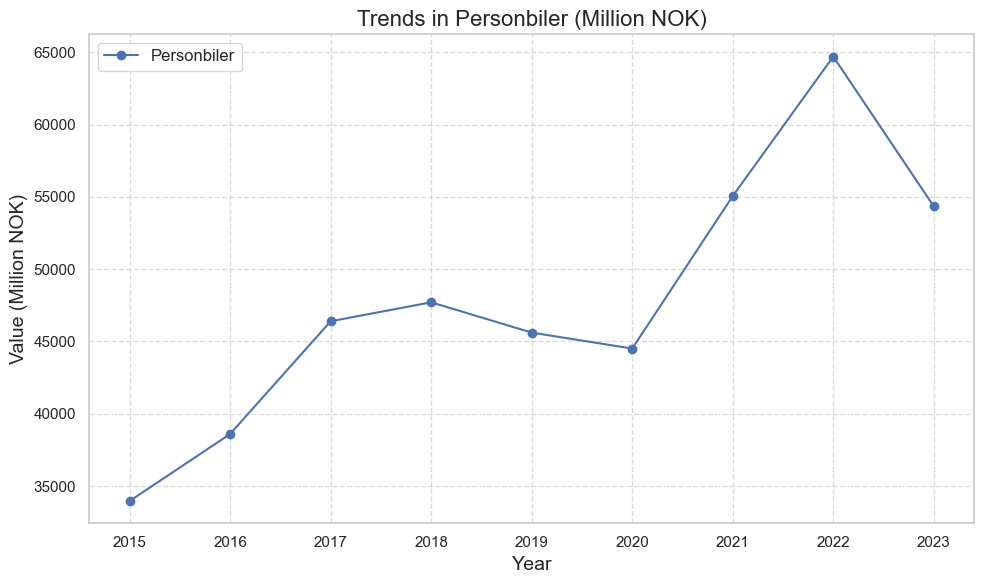

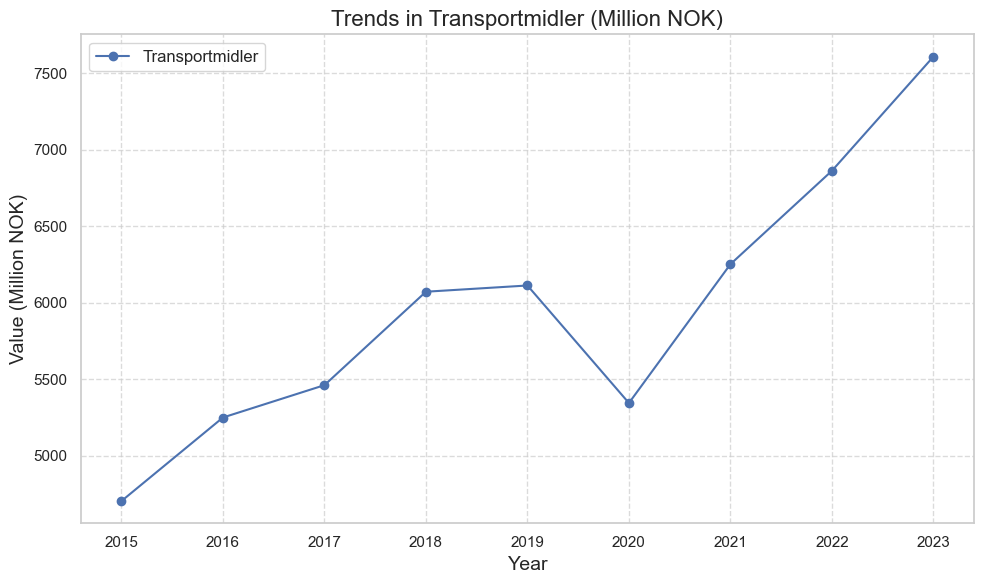

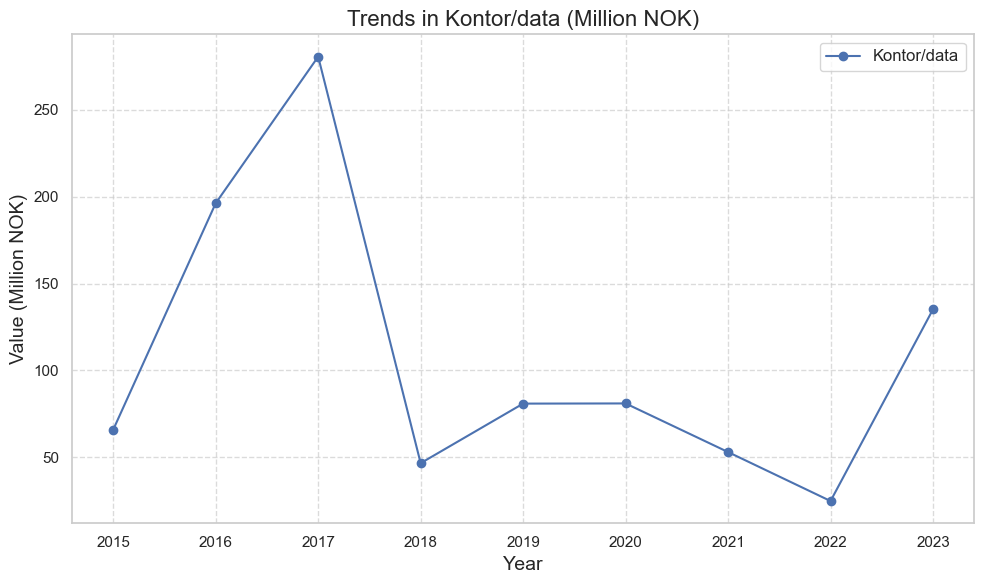

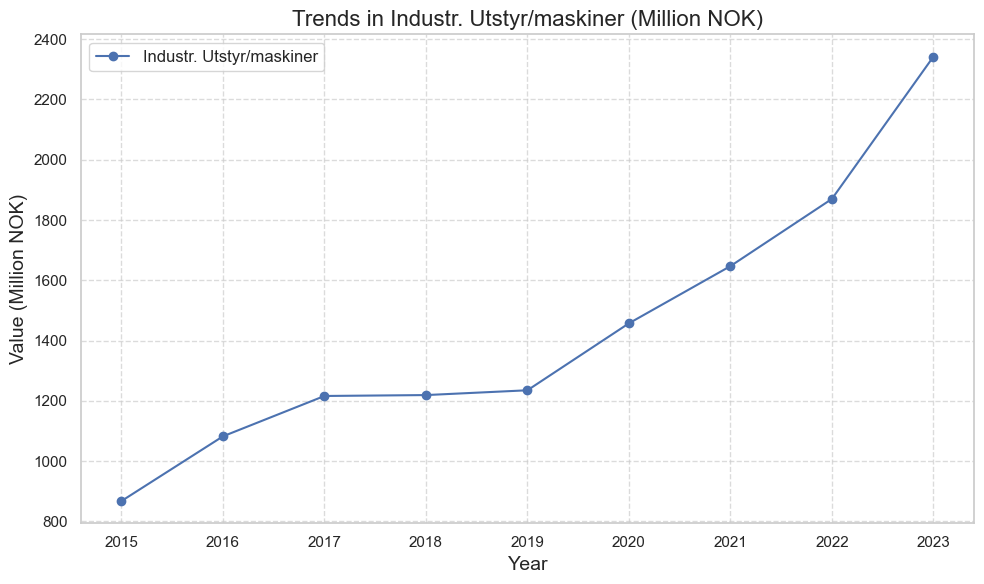

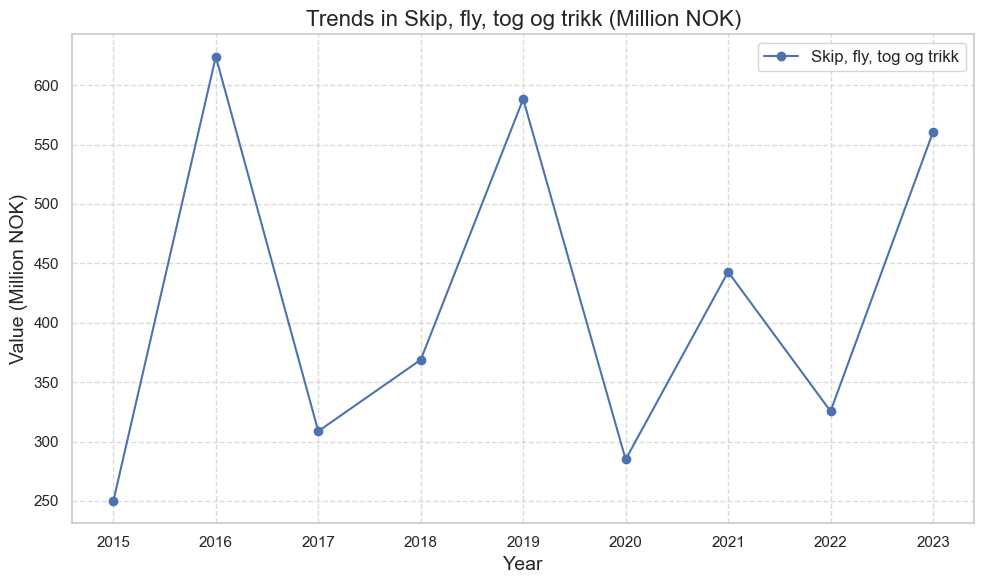

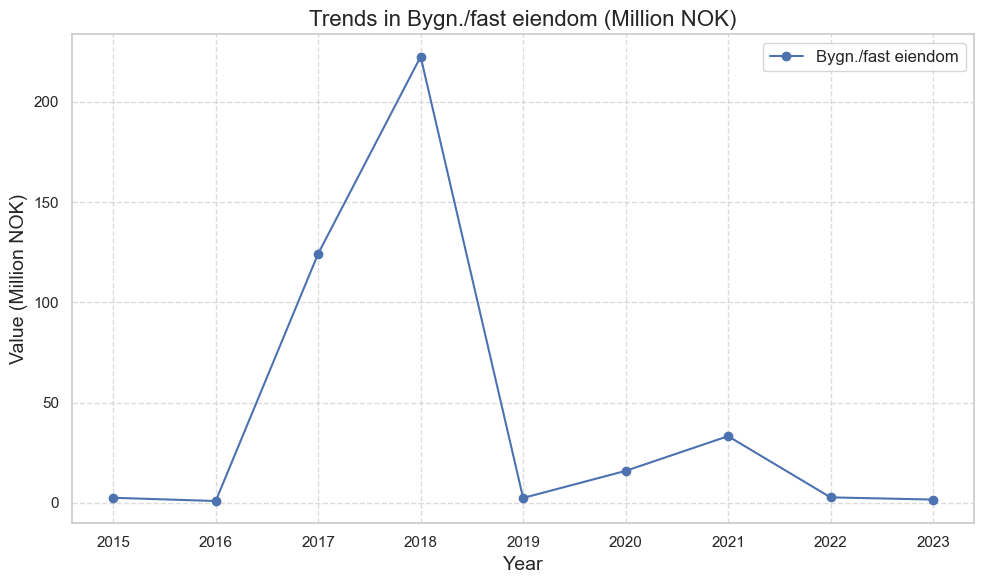

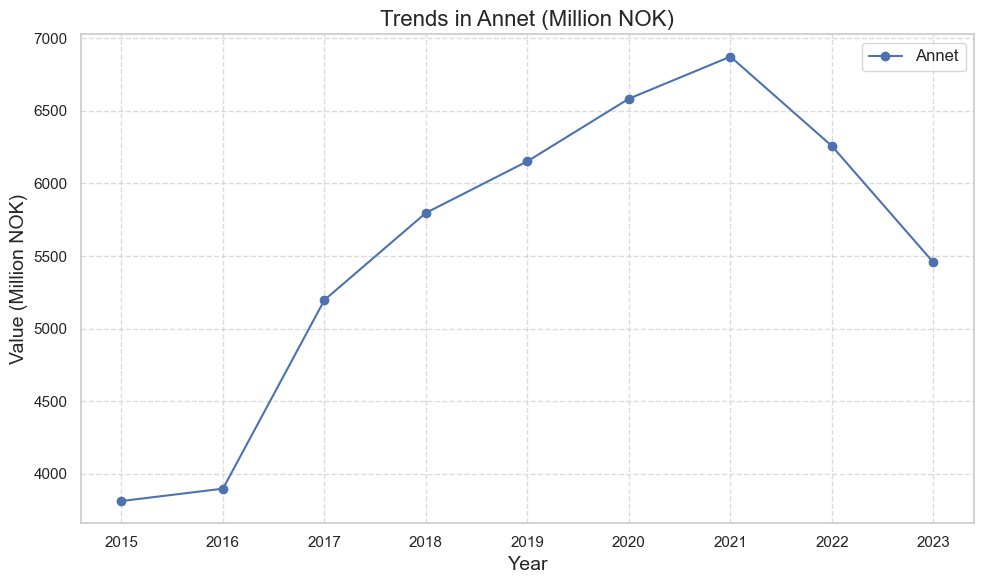

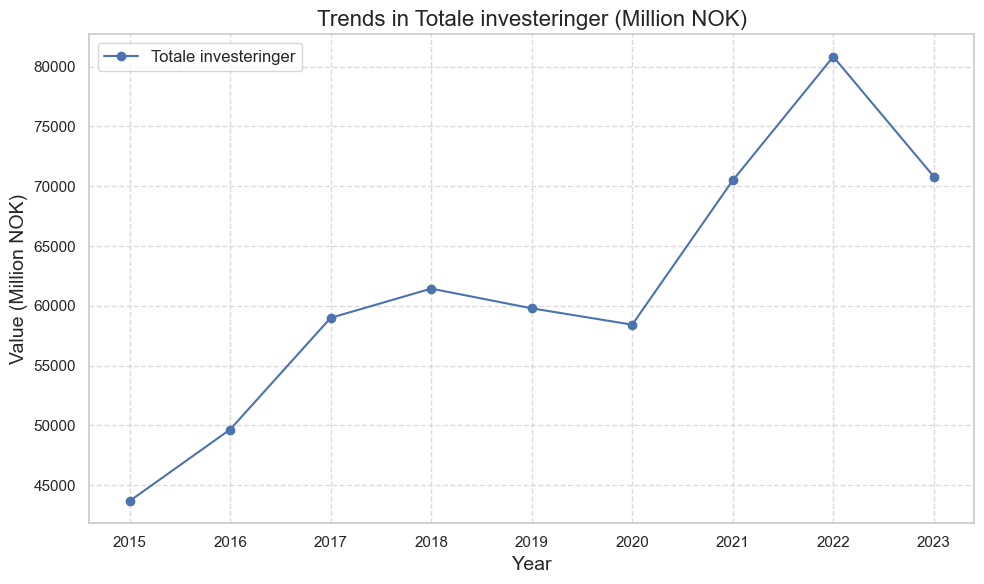

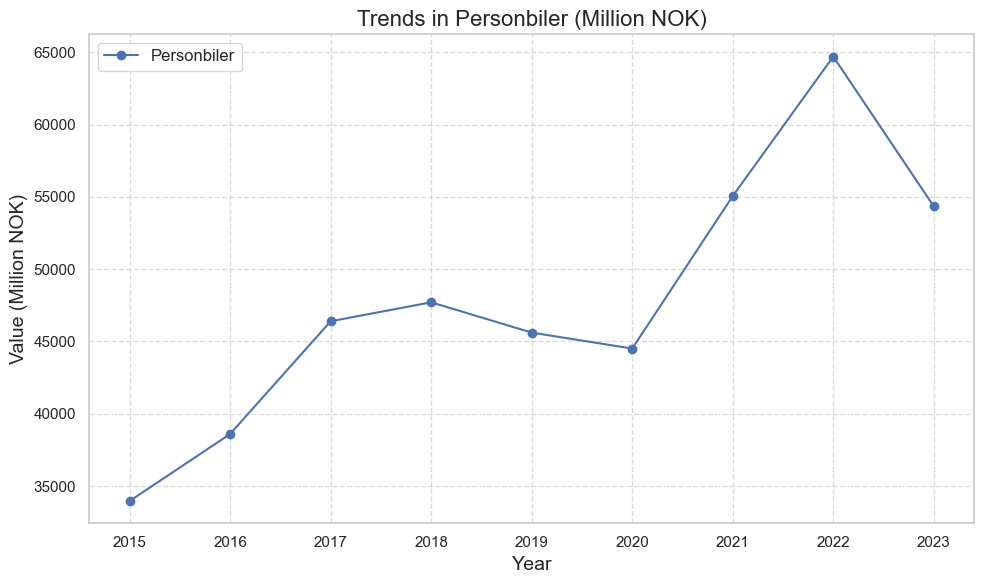

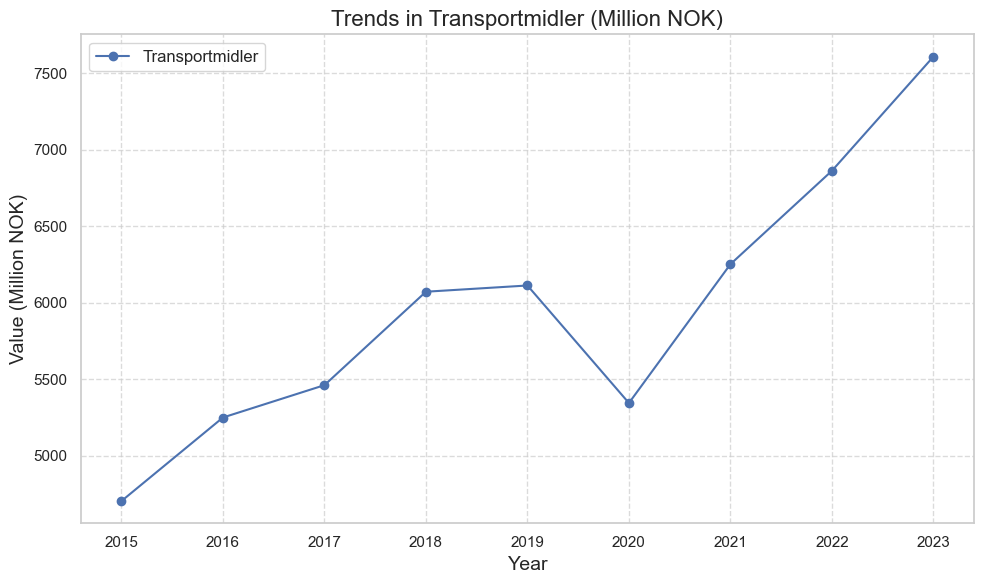

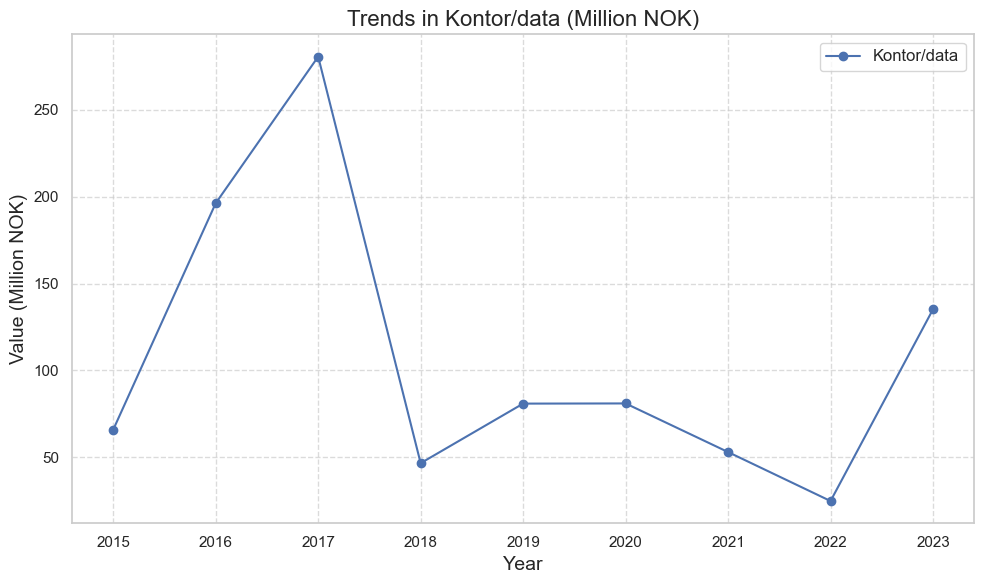

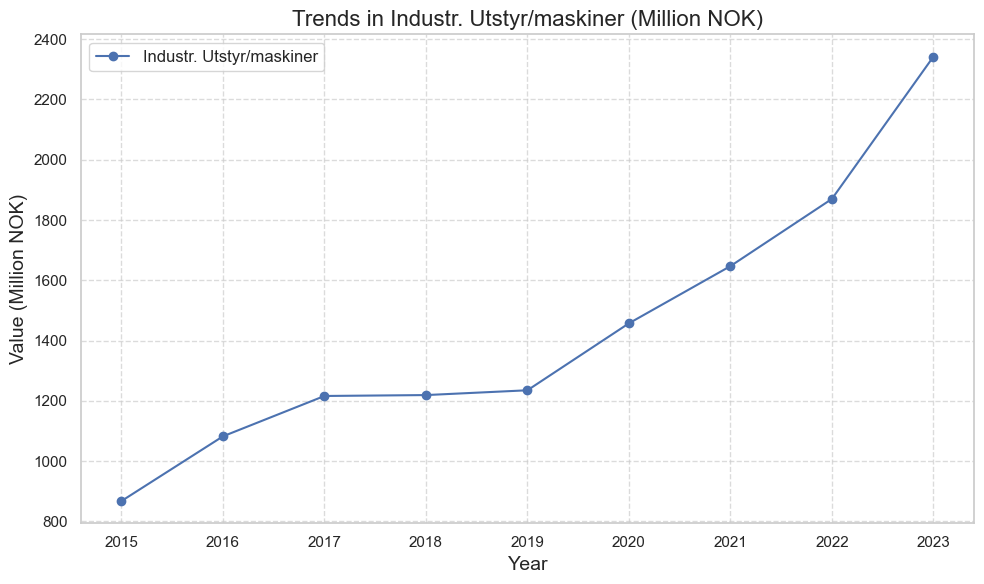

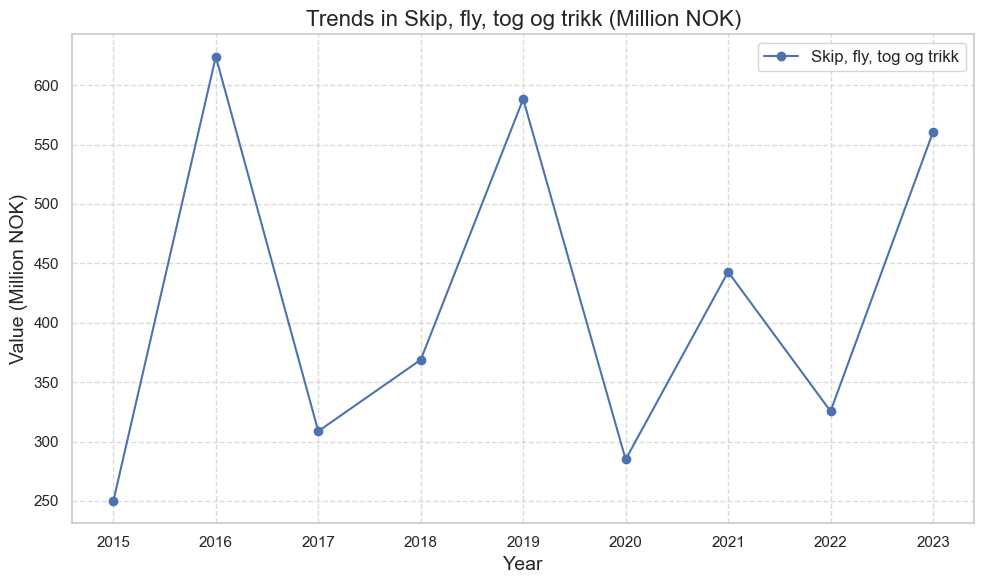

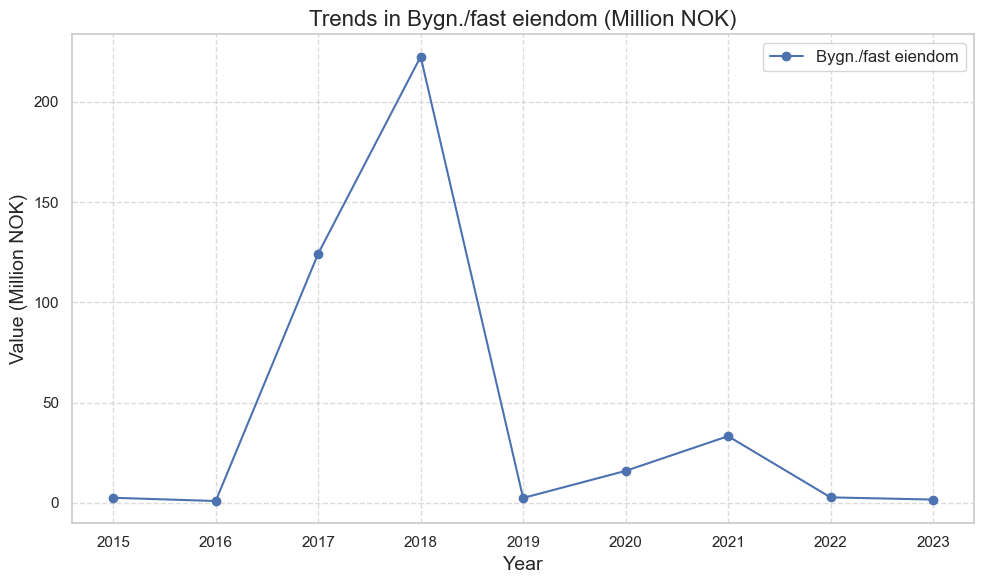

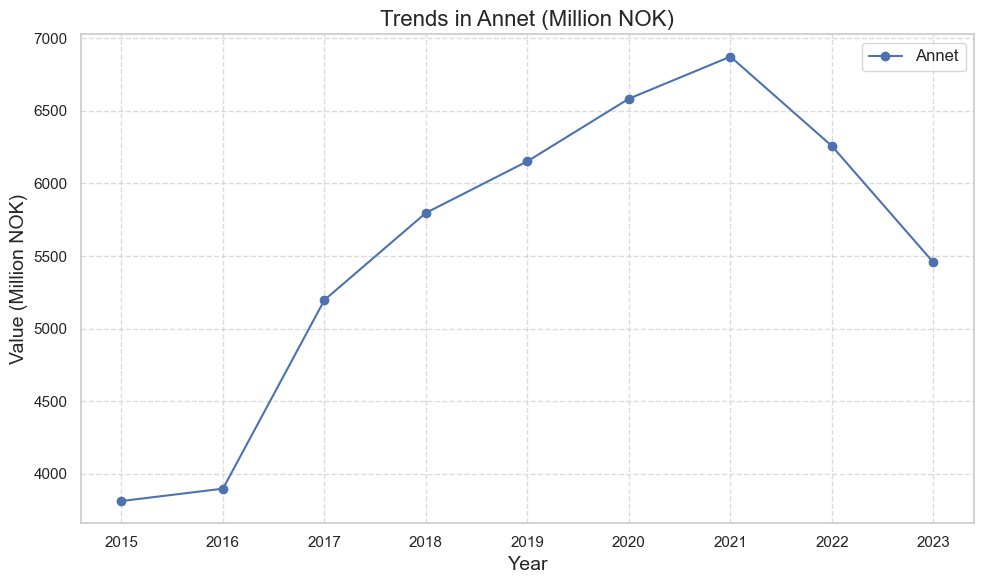

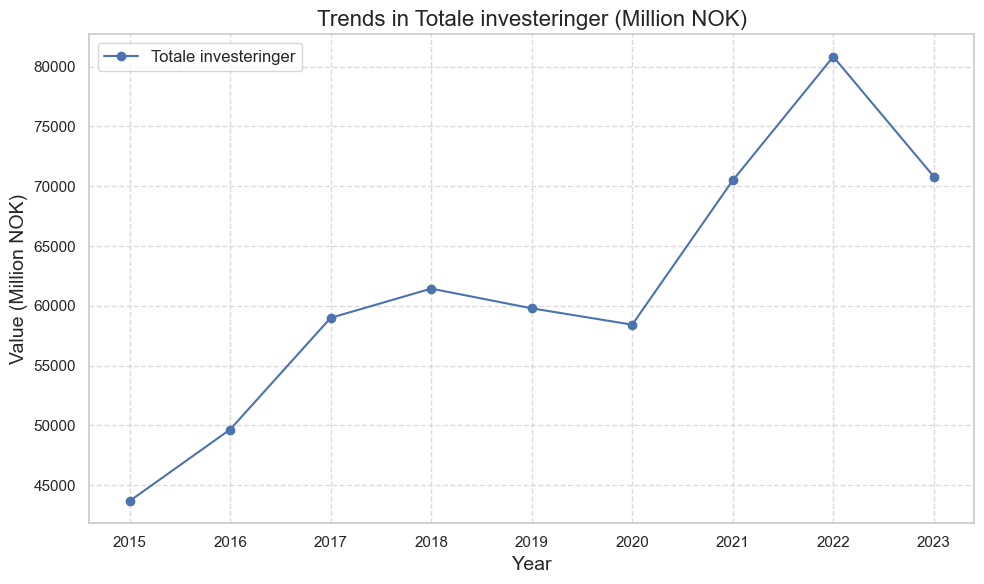

In [24]:
import matplotlib.pyplot as plt

columns_to_visualize = [
    "Personbiler",
    "Transportmidler",
    "Kontor/data",
    "Industr. Utstyr/maskiner",
    "Skip, fly, tog og trikk",
    "Bygn./fast eiendom",
    "Annet",
    "Totale investeringer",
]

existing_columns = [col for col in columns_to_visualize if col in merged_df.columns]

data_to_plot = merged_df.groupby("year")[existing_columns].sum()

for column in existing_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(
        data_to_plot.index,
        data_to_plot[column],
        marker="o",
        linestyle="-",
        label=column,
    )
    plt.title(f"Trends in {column} (Million NOK)", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Value (Million NOK)", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

columns_to_visualize = [
    "Personbiler",
    "Transportmidler",
    "Kontor/data",
    "Industr. Utstyr/maskiner",
    "Skip, fly, tog og trikk",
    "Bygn./fast eiendom",
    "Annet",
    "Totale investeringer",
]

existing_columns = [col for col in columns_to_visualize if col in merged_df.columns]

data_to_plot = merged_df.groupby("year")[existing_columns].sum()

for column in existing_columns:
    plt.figure(figsize=(10, 6))
    plt.plot(
        data_to_plot.index,
        data_to_plot[column],
        marker="o",
        linestyle="-",
        label=column,
    )
    plt.title(f"Trends in {column} (Million NOK)", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Value (Million NOK)", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

## Leasing Development Across Equipment Categories Over Time:

Industrial Equipment shows strong overall growth from around 900M NOK in 2015 to over 2000M NOK in 2023. While Office/Data Equipment shows lower values overall, staying below 300M NOK throughout the period with a slight increase from 2015 to 2017,then decline after 2017, followed by relative stability

The plot suggests a clear shift in leasing preferences toward industrial equipment, particularly in recent years, while office/data equipment leasing has remained relatively stable at lower levels.

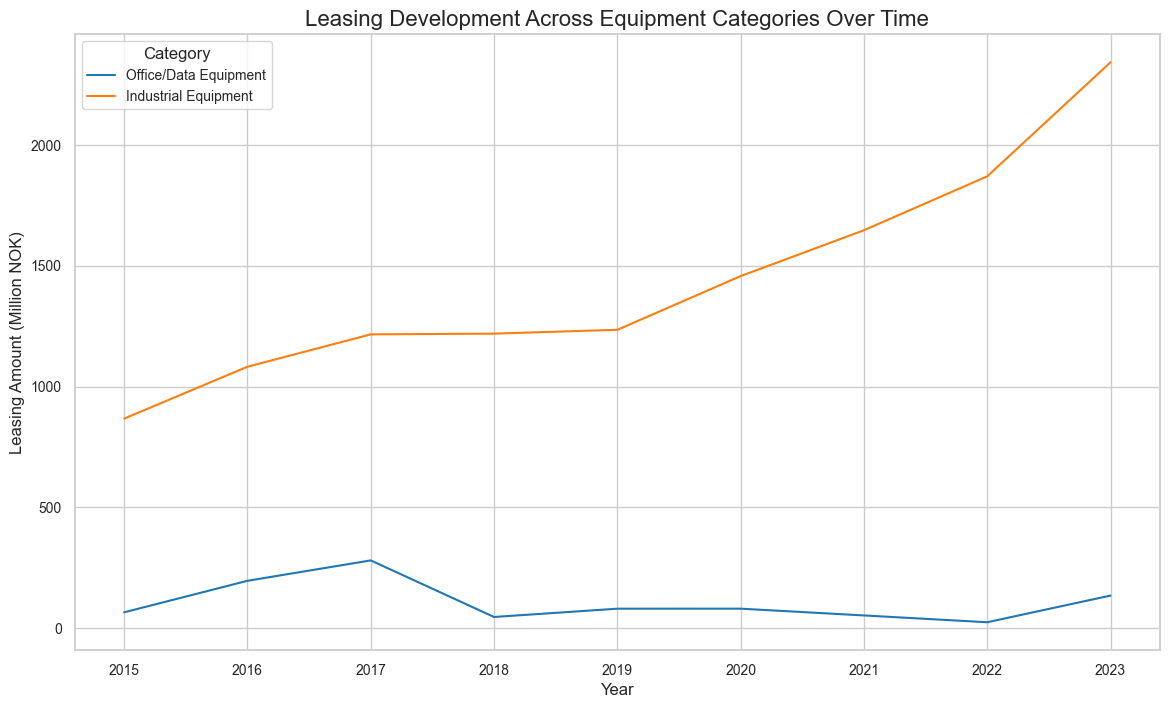

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specifying the columns to visualize
columns_to_visualize = [
    "Kontor/data",
    "Industr. Utstyr/maskiner",
]

column_rename_map = {
    "Kontor/data": "Office/Data Equipment",
    "Industr. Utstyr/maskiner": "Industrial Equipment",
    "Skip, fly, tog og trikk": "Ships, Aircraft, Rail",
}


melted_data = merged_df[["year"] + columns_to_visualize].melt(
    id_vars="year",
    value_vars=columns_to_visualize,
    var_name="Category",
    value_name="Leasing Amount",
)

melted_data["Category"] = melted_data["Category"].map(column_rename_map)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=melted_data, x="year", y="Leasing Amount", hue="Category", palette="tab10"
)

plt.title("Leasing Development Across Equipment Categories Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Leasing Amount (Million NOK)", fontsize=12)
plt.legend(title="Category", fontsize=10, title_fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## This graph shows the growth rates (in percentage) across different leasing categories:
This visualization highlights the relative stability of most leasing categories except for Buildings/Real Estate, which experienced exceptional but temporary growth spikes.

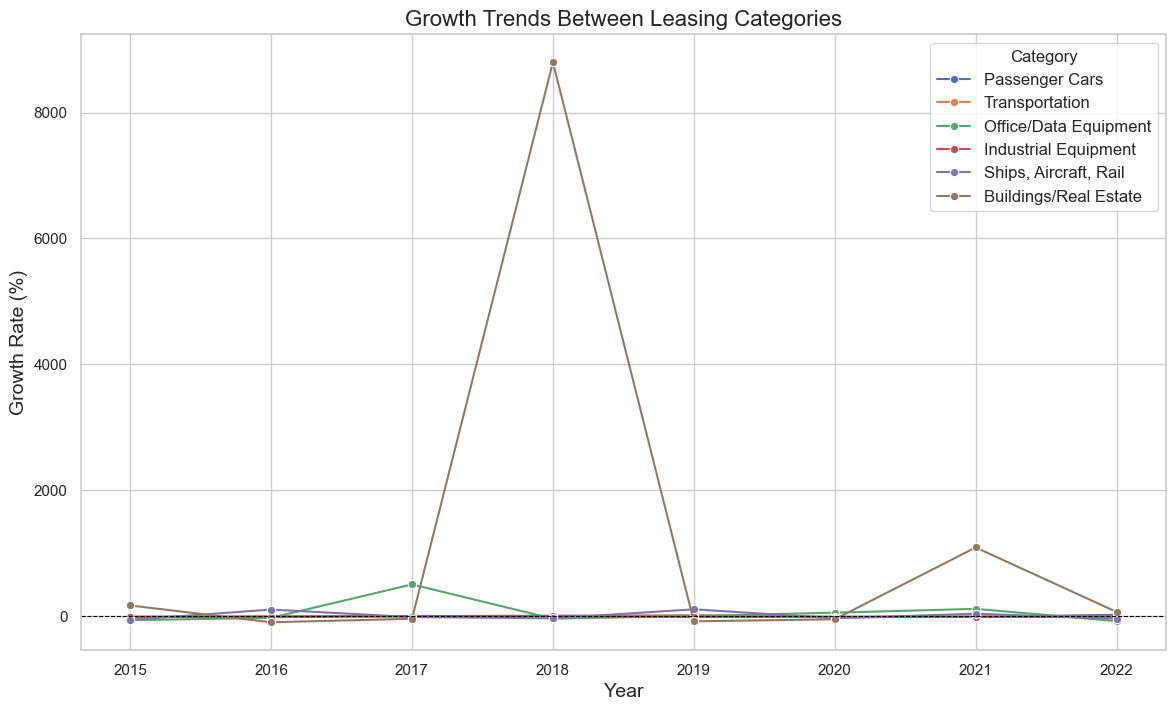

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

categories = [
    "Personbiler",
    "Transportmidler",
    "Kontor/data",
    "Industr. Utstyr/maskiner",
    "Skip, fly, tog og trikk",
    "Bygn./fast eiendom",
]

column_rename_map = {
    "Personbiler": "Passenger Cars",
    "Transportmidler": "Transportation",
    "Kontor/data": "Office/Data Equipment",
    "Industr. Utstyr/maskiner": "Industrial Equipment",
    "Skip, fly, tog og trikk": "Ships, Aircraft, Rail",
    "Bygn./fast eiendom": "Buildings/Real Estate",
}
renamed_categories = [column_rename_map[col] for col in categories]

growth_rates = merged_df[categories].pct_change() * 100
growth_rates["year"] = merged_df["year"]
growth_rates_melted = pd.melt(
    growth_rates,
    id_vars="year",
    value_vars=categories,
    var_name="Category",
    value_name="Growth Rate",
)

growth_rates_melted["Category"] = growth_rates_melted["Category"].map(column_rename_map)

sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=growth_rates_melted, x="year", y="Growth Rate", hue="Category", marker="o"
)

plt.title("Growth Trends Between Leasing Categories", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Growth Rate (%)", fontsize=14)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.legend(title="Category", fontsize=12)

plt.grid(visible=True)

plt.show()

## Leasing Development Across Equipment Categories Over Time

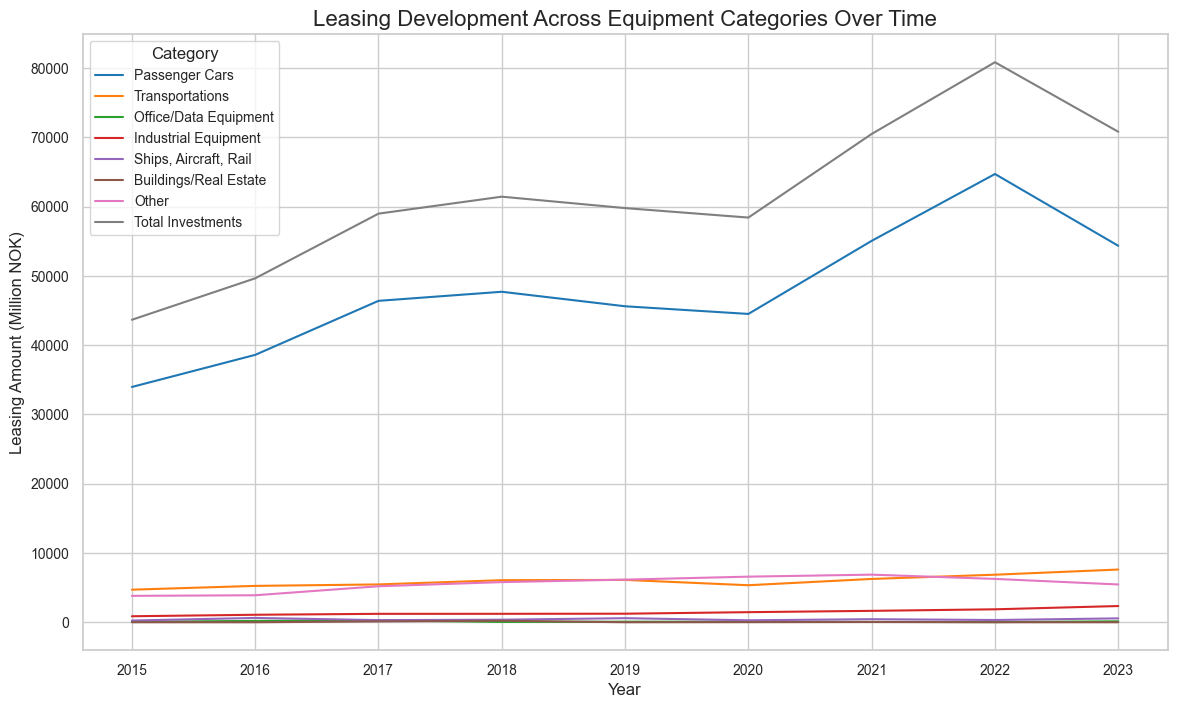

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

columns_to_visualize = [
    "Personbiler",
    "Transportmidler",
    "Kontor/data",
    "Industr. Utstyr/maskiner",
    "Skip, fly, tog og trikk",
    "Bygn./fast eiendom",
    "Annet",
    "Totale investeringer",
]

column_rename_map = {
    "Personbiler": "Passenger Cars",
    "Transportmidler": "Transportations",
    "Kontor/data": "Office/Data Equipment",
    "Industr. Utstyr/maskiner": "Industrial Equipment",
    "Skip, fly, tog og trikk": "Ships, Aircraft, Rail",
    "Bygn./fast eiendom": "Buildings/Real Estate",
    "Annet": "Other",
    "Totale investeringer": "Total Investments",
}

melted_data = merged_df[["year"] + columns_to_visualize].melt(
    id_vars="year",
    value_vars=columns_to_visualize,
    var_name="Category",
    value_name="Leasing Amount",
)

melted_data["Category"] = melted_data["Category"].map(column_rename_map)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=melted_data, x="year", y="Leasing Amount", hue="Category", palette="tab10"
)


plt.title("Leasing Development Across Equipment Categories Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Leasing Amount (Million NOK)", fontsize=12)
plt.legend(title="Category", fontsize=10, title_fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## Interest Paid and Total Paid for office equipements over years:
This graph shows the Interest Paid and Total Paid amounts for office equipment from 2015 to 2023 in million NOK.
The total paid (orange bars) shows significant increase in 2023 to 143.36 million NOK.
Interest paid (blue bars) shows consistently much lower than total paid.

/var/folders/tw/ccs7_mhx3rd239l25k3wzv9r0000gn/T/ipykernel_7125/2688919723.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_data["Interest_Paid"] = spending_data["Kontor/data"] * (
/var/folders/tw/ccs7_mhx3rd239l25k3wzv9r0000gn/T/ipykernel_7125/2688919723.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_data["Total_Paid"] = (


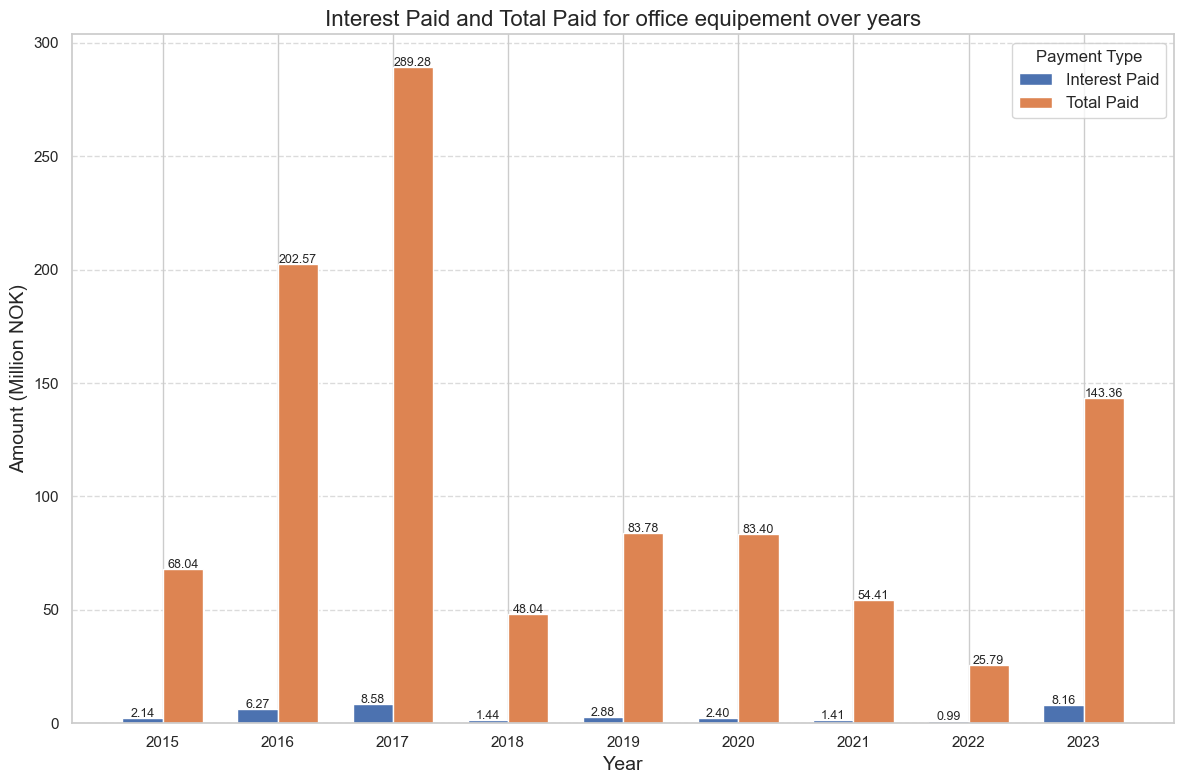

In [28]:
columns_for_calculation = [
    "year",
    "Kontor/data",
    "lending_interest_inklprovisions_finansierselskap",
]
spending_data = merged_df[columns_for_calculation]

spending_data["Interest_Paid"] = spending_data["Kontor/data"] * (
    spending_data["lending_interest_inklprovisions_finansierselskap"] / 100
)
spending_data["Total_Paid"] = (
    spending_data["Kontor/data"] + spending_data["Interest_Paid"]
)

total_paid_data = (
    spending_data.groupby("year")[["Interest_Paid", "Total_Paid"]].sum().reset_index()
)

plt.figure(figsize=(12, 8))
bar_width = 0.35
x = range(len(total_paid_data["year"]))

plt.bar(x, total_paid_data["Interest_Paid"], width=bar_width, label="Interest Paid")

plt.bar(
    [p + bar_width for p in x],
    total_paid_data["Total_Paid"],
    width=bar_width,
    label="Total Paid",
)

for i, row in total_paid_data.iterrows():
    plt.text(
        x=i,
        y=row["Interest_Paid"] + 0.5,
        s=f"{row['Interest_Paid']:.2f}",
        ha="center",
        fontsize=9,
    )
    plt.text(
        x=i + bar_width,
        y=row["Total_Paid"] + 0.5,
        s=f"{row['Total_Paid']:.2f}",
        ha="center",
        fontsize=9,
    )

plt.title("Interest Paid and Total Paid for office equipement over years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Amount (Million NOK)", fontsize=14)
plt.xticks([p + bar_width / 2 for p in x], total_paid_data["year"])
plt.legend(title="Payment Type", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## The correlation between the interest rate and leasing of office equipment:
 There is no significant correlation between interest rates data and the leasing of office equipment.The relationship appears to be random rather than systematic or causal.


Correlation Matrix:
                                                  Kontor/data  \
Kontor/data                                          1.000000   
key_policy_average_interest_rate                     0.149060   
lending_interest_inklprovisions_finansierselskap     0.029634   

                                                  key_policy_average_interest_rate  \
Kontor/data                                                               0.149060   
key_policy_average_interest_rate                                          1.000000   
lending_interest_inklprovisions_finansierselskap                          0.943904   

                                                  lending_interest_inklprovisions_finansierselskap  
Kontor/data                                                                               0.029634  
key_policy_average_interest_rate                                                          0.943904  
lending_interest_inklprovisions_finansierselskap                       

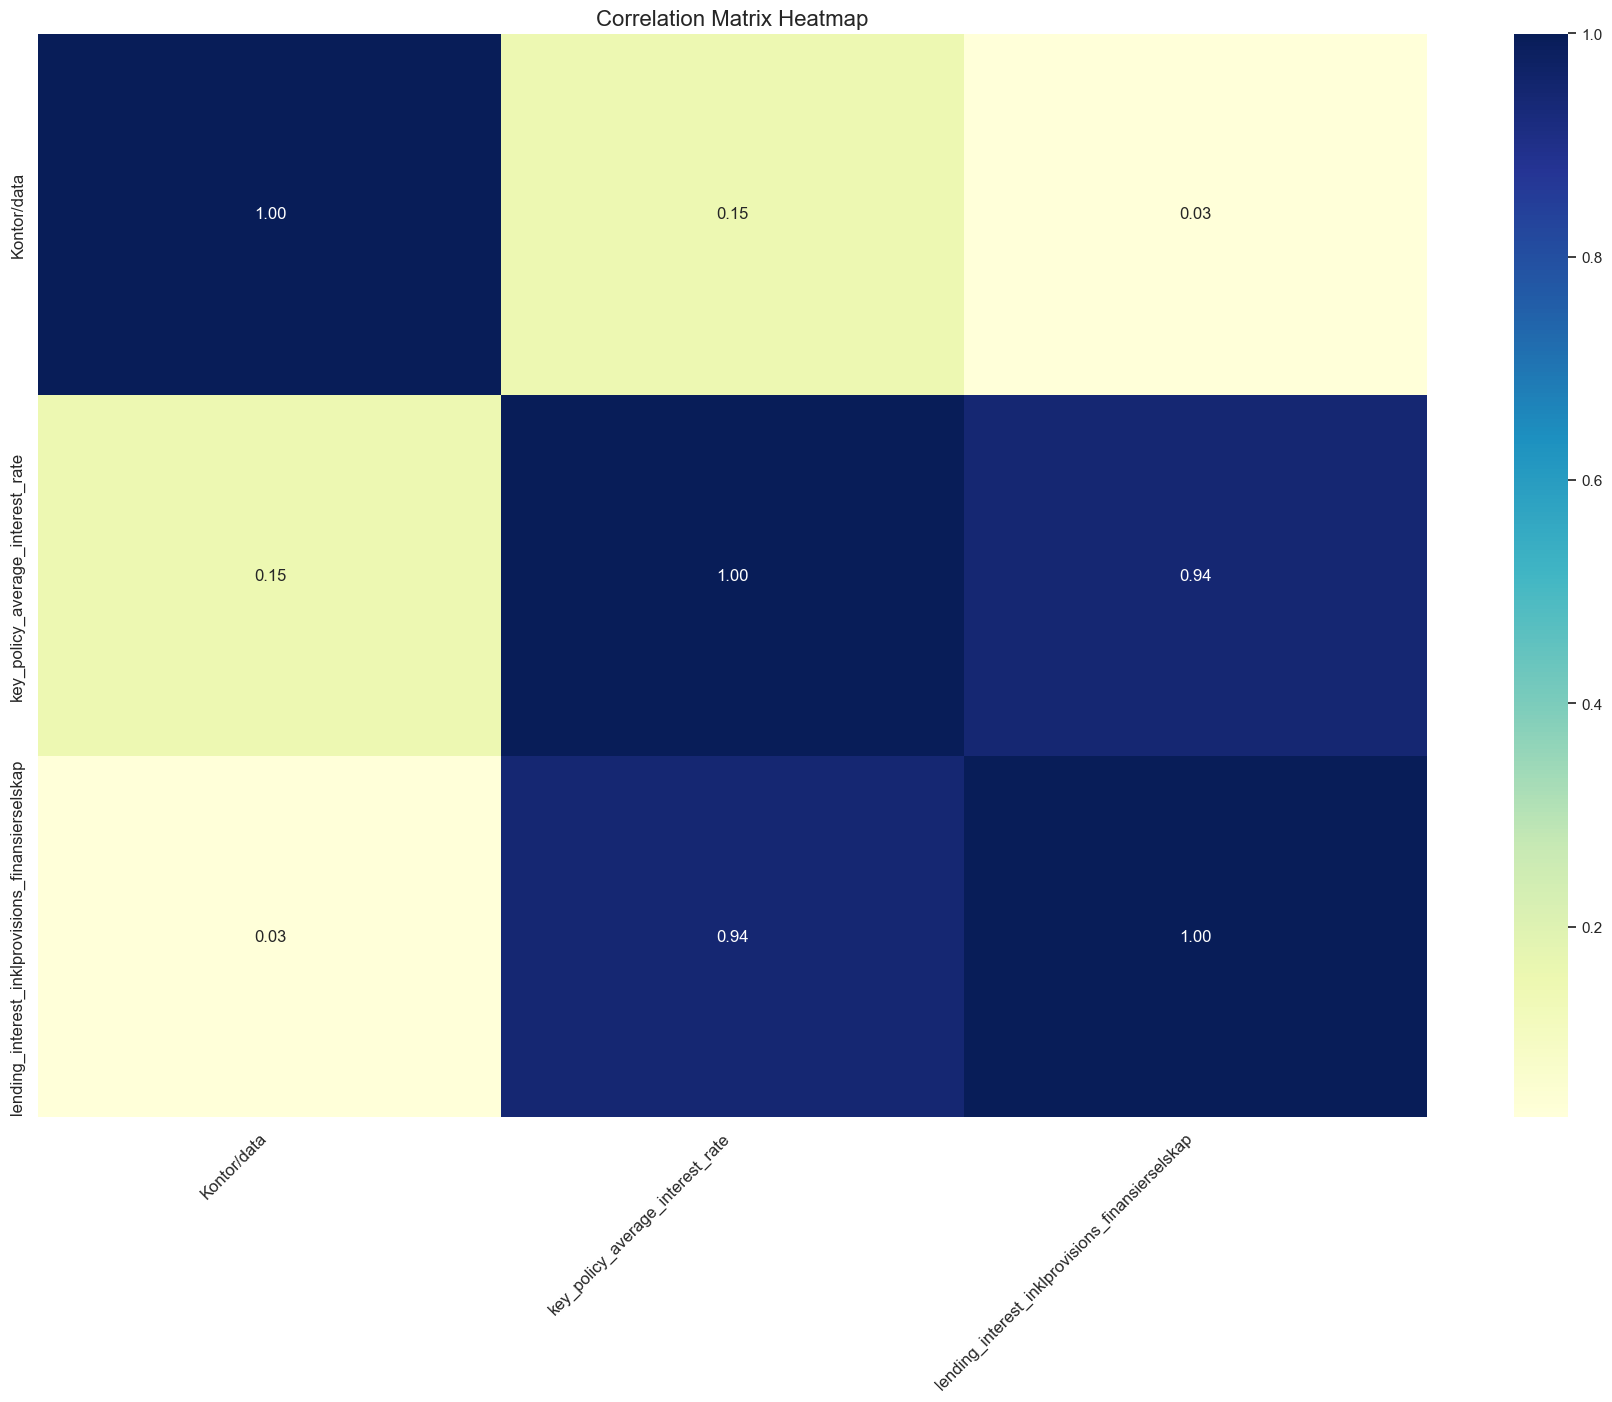

                         Variable 1  \
0                       Kontor/data   
1                       Kontor/data   
2  key_policy_average_interest_rate   

                                         Variable 2  Correlation   P-value  
0                  key_policy_average_interest_rate     0.149060  0.701904  
1  lending_interest_inklprovisions_finansierselskap     0.029634  0.939675  
2  lending_interest_inklprovisions_finansierselskap     0.943904  0.000130  


In [29]:
columns_of_interest = [
    "Kontor/data",
    "key_policy_average_interest_rate",
    "lending_interest_inklprovisions_finansierselskap",
]

correlation_matrix = merged_df[columns_of_interest].corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

from scipy.stats import pearsonr


def calculate_correlations_and_pvalues(data, columns):
    correlations = []
    p_values = []
    column_pairs = []

    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            corr, p_val = pearsonr(data[col1], data[col2])
            correlations.append(corr)
            p_values.append(p_val)
            column_pairs.append((col1, col2))

    return pd.DataFrame(
        {
            "Variable 1": [pair[0] for pair in column_pairs],
            "Variable 2": [pair[1] for pair in column_pairs],
            "Correlation": correlations,
            "P-value": p_values,
        }
    )


results = calculate_correlations_and_pvalues(merged_df, columns_of_interest)
print(results)

New table added to dicover the seasonal correlation. This data is published by ssb (10648: Interest rates and related loan amounts), and contians quartely interest rates including commissions by Financing companies:
### The results of Seasonal Correlation: -0.0561, very weak negative correlations 


The purpose of this:

Identify if there are similar seasonal patterns between office equipment leasing and interest rates.

Calculate how strongly these seasonal patterns correlate.

Help to understand if the seasonal variations in interest rates relate to seasonal variations in leasing behavior.


In [30]:
# Reupload the datasets from finfo and ssb:
from statsmodels.tsa.seasonal import seasonal_decompose

leasing_data = pd.read_csv("data/andre-utlan.csv")
interest_rate_data = pd.read_csv("data/utlånsrente-finansieringselskap.csv")

leasing_data.columns = (
    leasing_data.columns.str.strip()
    .str.replace(" ", "_")
    .str.replace(".", "", regex=False)
    .str.replace("/", "_")
)

leasing_data["Kontor_data"] = (
    leasing_data["Kontor_data"].replace(",", "", regex=True).astype(float)
)

leasing_data["timestamp"] = pd.PeriodIndex(
    leasing_data["year"].astype(str), freq="Y"
).to_timestamp()

interest_rate_data["timestamp"] = pd.PeriodIndex(
    interest_rate_data["month"].str.replace("K", "Q"), freq="Q"
).to_timestamp()

interest_rate_data.rename(
    columns={"lending_interest_inklprovisions_finansierselskap": "Interest_Rate"},
    inplace=True,
)

seasonal_df = pd.merge(
    leasing_data[["timestamp", "Kontor_data"]],
    interest_rate_data[["timestamp", "Interest_Rate"]],
    on="timestamp",
    how="inner",
)

column1 = "Kontor_data"
column2 = "Interest_Rate"

if column1 not in seasonal_df.columns or column2 not in seasonal_df.columns:
    raise KeyError(f"Columns '{column1}' or '{column2}' not found in the dataset.")

result_col1 = seasonal_decompose(seasonal_df[column1], model="additive", period=4)
result_col2 = seasonal_decompose(seasonal_df[column2], model="additive", period=4)

seasonal_col1 = result_col1.seasonal
seasonal_col2 = result_col2.seasonal

seasonal_correlation = seasonal_col1.corr(seasonal_col2)

print(f"Seasonal Correlation: {seasonal_correlation}")

Seasonal Correlation: -0.056117194730537945


Correlation values with 'Kontor/data':
average_interest                   -0.005024
max_interest                       -0.171408
min_interest                        0.158833
key_policy_average_interest_rate    0.149060
Name: Kontor/data, dtype: float64


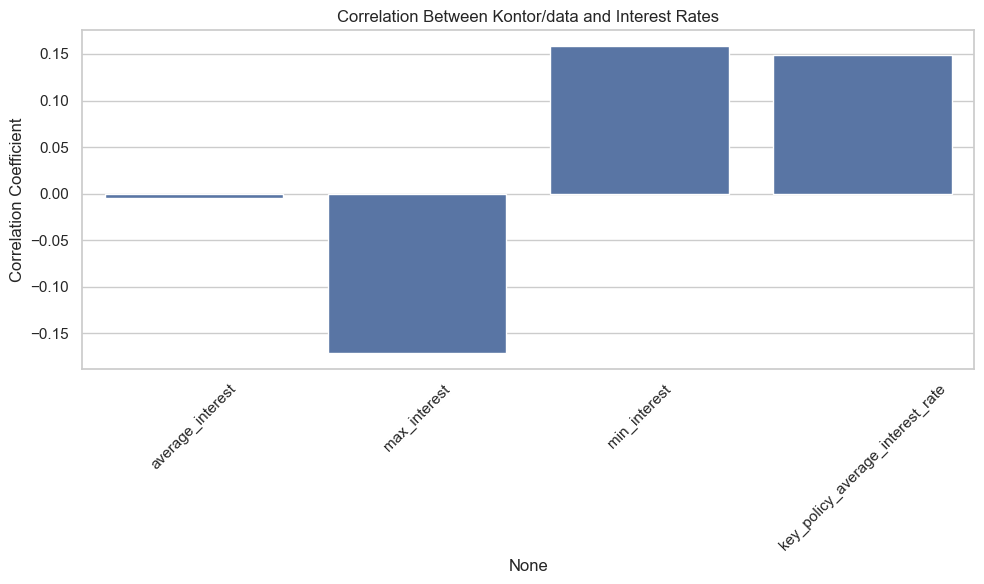

In [31]:

interest_columns = [
    "average_interest",
    "max_interest",
    "min_interest",
    "key_policy_average_interest_rate",
]
correlation = merged_df[["Kontor/data"] + interest_columns].corr()

kontor_correlations = correlation["Kontor/data"].drop("Kontor/data")

print("Correlation values with 'Kontor/data':")
print(kontor_correlations)

plt.figure(figsize=(10, 6))
sns.barplot(x=kontor_correlations.index, y=kontor_correlations.values)
plt.title("Correlation Between Kontor/data and Interest Rates")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exploring lagged correlation
Exploring lagged correlation between the leasing amount the interest rates, since there was no strong correlations detected. As well as that many businesses plan their leasing decisions annually. A lag analysis can show if companies make decisions on historical interest rates rather than current ones.
### Results
The results indicate a strong lagged correlation with the last year. A strong negative correlation with the previous year's interest rate, meaning there is a decrease in leasing volume for the following year.
This could be used to forecast next year’s leasing activity. 

In [32]:
merged_df = pd.read_csv("data/merged_df_output.csv")
quarterly_interest = pd.read_csv("data/utlånsrente-finansieringselskap.csv")

def analyze_correlations():

    quarterly_interest["year"] = quarterly_interest["month"].str[:4].astype(int)
    yearly_interest_stats = (
        quarterly_interest.groupby("year")[
            "lending_interest_inklprovisions_finansierselskap"
        ]
        .agg(["mean", "max", "min", "std"])
        .reset_index()
    )

    final_df = pd.merge(
        merged_df[["year", "Kontor/data"]],
        yearly_interest_stats,
        on="year",
        how="inner",
    )

    correlations = {
        "Mean Interest Rate": final_df["Kontor/data"].corr(final_df["mean"]),
        "Max Interest Rate": final_df["Kontor/data"].corr(final_df["max"]),
        "Min Interest Rate": final_df["Kontor/data"].corr(final_df["min"]),
    }

    p_values = {}
    for rate_type in ["mean", "max", "min"]:
        correlation, p_value = stats.pearsonr(
            final_df["Kontor/data"], final_df[rate_type]
        )
        p_values[f"{rate_type.capitalize()} Interest Rate"] = p_value

    print("\nDetailed Correlation Analysis:")
    print("=" * 50)
    for metric in correlations.keys():
        print(f"\n{metric}:")
        print(f"Correlation coefficient: {correlations[metric]:.3f}")
        print(f"P-value: {p_values[metric]:.3f}")
        print(
            f"Statistical significance: {'Significant' if p_values[metric] < 0.05 else 'Not significant'} at α=0.05"
        )

    print("\nLagged Correlations Analysis:")
    print("=" * 50)
    print("(Testing if past interest rates affect current leasing)")
    for lag in range(1, 4):
        lagged_correlation = final_df["Kontor/data"].corr(final_df["mean"].shift(lag))
        print(f"\nLag {lag} year correlation: {lagged_correlation:.3f}")

    plt.figure(figsize=(12, 7))

    sns.regplot(
        data=final_df,
        x="mean",
        y="Kontor/data",
        scatter_kws={"alpha": 0.6, "s": 80, "color": "blue"},
        line_kws={"color": "red", "linewidth": 2},
    )

    plt.text(
        0.05,
        0.95,
        f'Corr: {correlations["Mean Interest Rate"]:.3f}',
        transform=plt.gca().transAxes,
        fontsize=12,
        bbox=dict(facecolor="white", alpha=0.8),
    )

    plt.title(
        "Leasing Amount vs Interest Rate Correlation Analysis",
        pad=20,
        fontsize=14,
        fontweight="bold",
    )
    plt.xlabel("Average Interest Rate (%)")
    plt.ylabel("Leasing Amount")
    plt.grid(True, alpha=0.3)

    x = final_df["mean"]
    y = final_df["Kontor/data"]

    for i, year in enumerate(final_df["year"]):
        plt.annotate(
            str(year), (x.iloc[i], y.iloc[i]), xytext=(5, 5), textcoords="offset points"
        )

    plt.tight_layout()
    plt.show()
    print("\nSummary Statistics:")
    print("=" * 50)
    print("\nLeasing Amount:")
    print(final_df["Kontor/data"].describe())
    print("\nMean Interest Rate:")
    print(final_df["mean"].describe())


if __name__ == "__main__":
    analyze_correlations()

NameError: name 'stats' is not defined

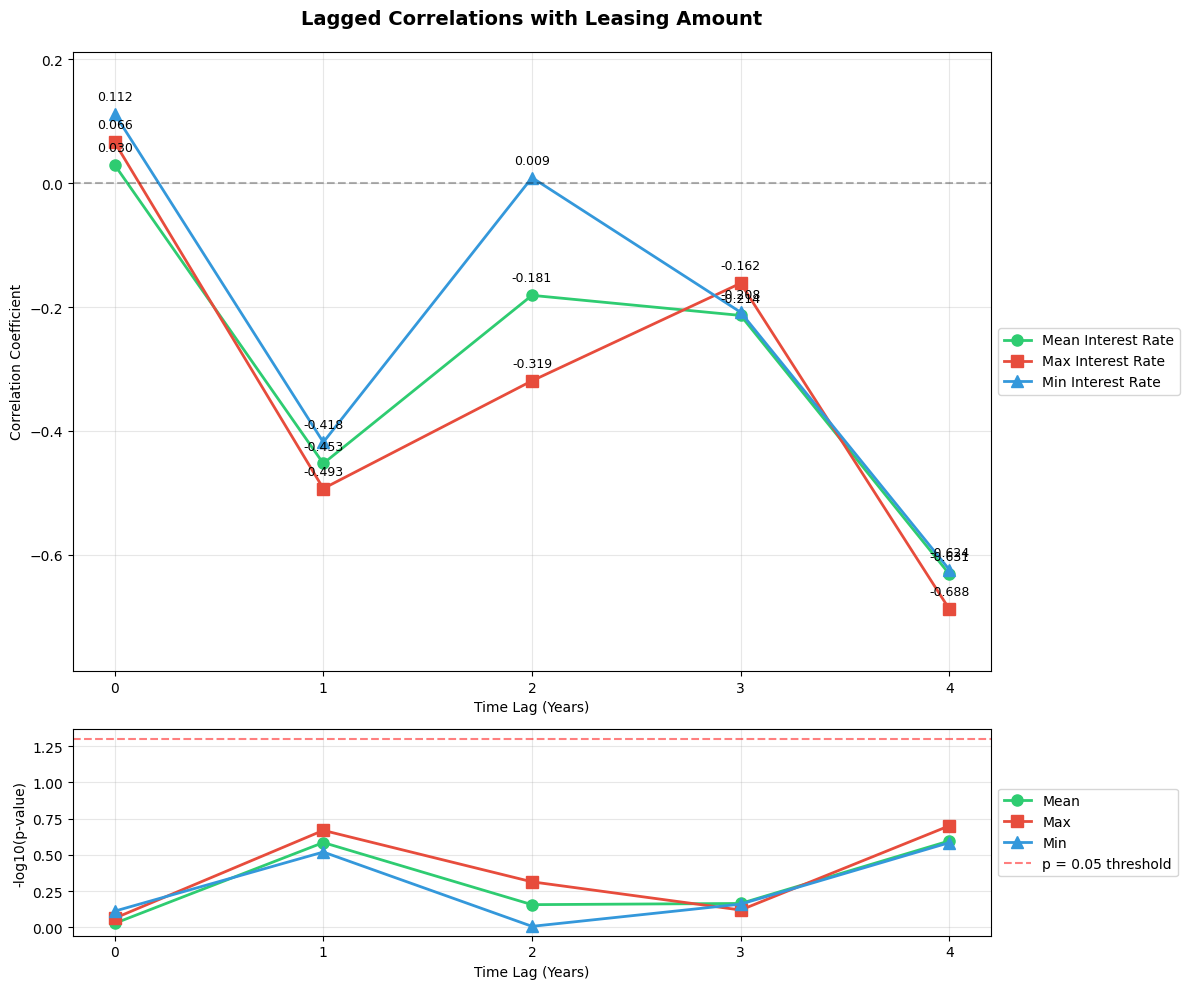

In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

plt.style.use("default")

quarterly_interest["year"] = quarterly_interest["month"].str[:4].astype(int)
yearly_interest_stats = (
    quarterly_interest.groupby("year")[
        "lending_interest_inklprovisions_finansierselskap"
    ]
    .agg(["mean", "max", "min"])
    .reset_index()
)

final_df = pd.merge(
    merged_df[["year", "Kontor/data"]], yearly_interest_stats, on="year", how="inner"
)

max_lag = 5
rate_types = ["mean", "max", "min"]
lag_correlations = {}
p_values = {}

for rate in rate_types:
    lag_correlations[rate] = []
    p_values[rate] = []

    for lag in range(max_lag):
        temp_df = pd.DataFrame(
            {"target": final_df["Kontor/data"], "lagged": final_df[rate].shift(lag)}
        ).dropna()

        correlation = temp_df["target"].corr(temp_df["lagged"])
        _, p_value = stats.pearsonr(temp_df["target"], temp_df["lagged"])

        lag_correlations[rate].append(correlation)
        p_values[rate].append(p_value)
        
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), height_ratios=[3, 1])

colors = ["#2ecc71", "#e74c3c", "#3498db"]
markers = ["o", "s", "^"]

for i, (rate, correlations) in enumerate(lag_correlations.items()):
    ax1.plot(
        range(max_lag),
        correlations,
        label=f"{rate.capitalize()} Interest Rate",
        color=colors[i],
        marker=markers[i],
        linewidth=2,
        markersize=8,
    )

    # Add correlation values
    for j, corr in enumerate(correlations):
        ax1.annotate(
            f"{corr:.3f}",
            (j, corr),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
            fontsize=9,
        )

ax1.set_title(
    "Lagged Correlations with Leasing Amount", pad=20, fontsize=14, fontweight="bold"
)
ax1.set_xlabel("Time Lag (Years)")
ax1.set_ylabel("Correlation Coefficient")
ax1.grid(True, alpha=0.3)
ax1.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax1.set_xticks(range(max_lag))
ax1.axhline(y=0, color="black", linestyle="--", alpha=0.3)

y_min = min(min(v) for v in lag_correlations.values()) - 0.1
y_max = max(max(v) for v in lag_correlations.values()) + 0.1
ax1.set_ylim(y_min, y_max)

for i, (rate, p_vals) in enumerate(p_values.items()):
    sig_levels = [-np.log10(p) for p in p_vals]
    ax2.plot(
        range(max_lag),
        sig_levels,
        label=f"{rate.capitalize()}",
        color=colors[i],
        marker=markers[i],
        linewidth=2,
        markersize=8,
    )

ax2.axhline(
    y=-np.log10(0.05),
    color="red",
    linestyle="--",
    alpha=0.5,
    label="p = 0.05 threshold",
)

ax2.set_xlabel("Time Lag (Years)")
ax2.set_ylabel("-log10(p-value)")
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(max_lag))
ax2.legend(loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

## Conclusion
Office equipment leasing decisions are primarily driven by factors other than interest rates (such as business needs, technology cycles, or regulatory requirements). This suggests interest rates might be a secondary consideration in leasing decisions